## Supervised vs unsupervised

Unsupervised learning = Given X, predict Y

Definitions:
* Regression models predict a **continuous response** (numerical).
* Classification models predict a **discrete response** (categorical).

When we don't have a Y variable to predict, we are in the realm of **unsupervised learning**. Since there is no Y variable, unsupervised learning has no measurable "goal". Instead, unsupervised learning seeks to **represent the data in new ways**. 

Today we're introducing **clustering**; however, there are many other types of unsupervised learning.

> Data without a Y variable are sometimes referred to as **unlabeled** data. This is because the Y variable is often refered to as a **label**.

## Issues with unsupervised learning

Since there is no Y variable to "supervise" our learning:

* **What is "correct"?** Since there's no Y variable, we don't have an easy to way know if we're even doing a good job.
* **Tuning parameter selection.** Many unsupervised models have tuning parameters. How do we tune them if we don't know how to evaluate our model?
* **Unpredictability (clustering).** In clustering, it is very difficult to predict what our model will give us. It's possible that a clustering algorithm won't give us actionable results.

## Introduction to Clustering

**Clustering** is a task in which we seek to group our observations in **homogenous clusters**.
Since it's unsupervised, it is up to us, the data scientists, to decide what we mean by "homogenous".

## Uses of clustering
1. Marketing
2. Political polling
3. Recommender systems

## Clustering algorithms 

---

The are many different algorithms that can perform clustering given a dataset. 

These algorithms nearly always reduce to difficult optimization problems which may converge on a local minimum (similarly to gradient descent).

- **K-Means** (mean centroids)
- **DBSCAN** (density based)
- **Hierarchical** (nested clusters by merging or splitting successively)
- **Affinity Propagation** (graph based approach to let points 'vote' on their preferred 'exemplar')
- **Mean Shift** (can find number of clusters)
- **Spectral Clustering**
- **Agglomerative Clustering** (suite of algorithms all based on applying the same criteria/characteristics of one cluster to others)

## K-means clustering
---
K-Means is the most popular clustering algorithm and one of the easier methods to understand and other clustering techniques use some of the same assumptions that k-means relies on.

- **k** is the number of clusters.
- **Means** refers to the mean points of the k clusters.

**You must choose $k$, the number of clusters, in advance.**

The algorithm takes your entire dataset and iterates over its features and observations to determine clusters based around center points. These center points are known as **centroids**. 

**What does K-means do?**

> $K$-means partitions the data into sets of points (clusters). These clusters minimize the within-cluster sum-of-squares.

**K-means iterative fitting:**
1. Pick a value for $k$ (the number of clusters to create).
2. Initialize $k$ 'centroids' (starting points). These do not have to be actual data points!
3. Create clusters by assigning each data point to its nearest centroid.
4. Make your clusters better. Reassign each centroid to the center of its cluster.
5. Repeat steps 3-4 until the centroids converge and do not change across iterations.

$K$-means is guaranteed to converge.

## Things that could go wrong with clustering
1. Wispy flat blobs (dissect vertically instead of horizontally)
2. Outliers or lone wolf points
3. When it doesnt make sense to cluster at all!

## Initializing Centroids

---

There are different methods of initializing centroids. For instance:

- Randomly
- Manually
- Special KMeans++ method in Sklearn (_This initializes the centroids to be generally distant from each other_)

**Depending on your problem, you may find some of these are better than others.**

> **Note:** Manual is recommended if you know your data well enough to see the clusters without much help, but rarely used in practice.

## Choosing $k$
This still remains an open question. After all, we're tuning a tuning parameter with no metric for success! Here are three ideas:

* Make an educated guess
    - Industry knowledge (there are five kinds of Democrats...)
    - Visualization (probably impossible if you have more than 2 variables)
* Judge based on a pseudo-evaluation metric, like the **silhouette score**.
* If you're using the resulting cluster labels as input to a supervised learning method later, you can tune $k$ to have the best supervised learning model. This is **transfer learning**.


**Knowing your domain and dataset is essential. Evaluating the clusters visually is a must (if possible).**

# Code for k-means clustering!

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

# Let's make some more blobs to test K-Means on (total 100 blobs)
data, color = make_blobs(n_samples=100, random_state=29, centers=3, cluster_std=1.5)

df = pd.DataFrame(data, columns=["x1", "x2"])
df.head()

,x1,x2
0,7.081642,-5.248171
1,-3.036735,-0.129646
2,5.117565,-3.323573
3,-1.807058,-0.335986
4,4.519789,-5.469635


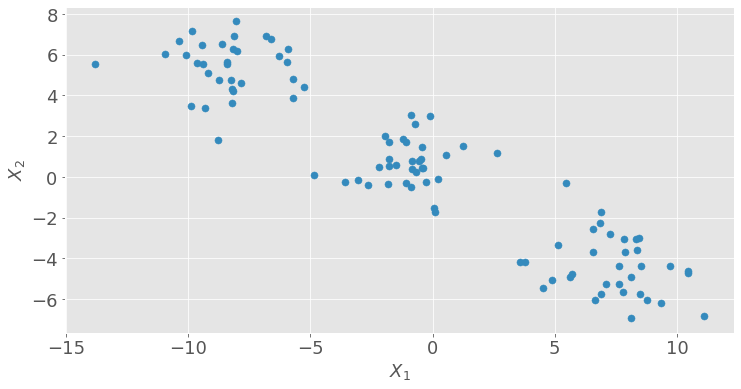

In [2]:
# Plot the scatter
ax = df.plot(kind="scatter", x="x1", y="x2", figsize=(12,6), s=50) # s changes the size of the blobs
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$X_2$", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [3]:
# Let's prepare our X matrix
X = df.loc[:, ['x1', 'x2']]
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [4]:
# (thread) How many K here?
# Fit a k-means clustering model
km = KMeans(n_clusters=3, random_state=42)
km.fit(X_sc)

KMeans(n_clusters=3, random_state=42)

In [5]:
# Check out original centroids coordinates
km.cluster_centers_

array([[-0.0338285 ,  0.03008366],
       [ 1.20438571, -1.19244188],
       [-1.16953211,  1.16144659]])

In [6]:
# Option 1: Class attribute
km.labels_

array([1, 0, 1, 0, 1, 2, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1, 1,
       1, 0, 1, 2, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 2, 0, 2,
       2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2,
       2, 1, 0, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 0, 0, 1, 0, 2, 2, 2,
       1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0])

In [7]:
# Option 2: Predict
km.predict(X_sc)

array([1, 0, 1, 0, 1, 2, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1, 1,
       1, 0, 1, 2, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 2, 0, 2,
       2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2,
       2, 1, 0, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 0, 0, 1, 0, 2, 2, 2,
       1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0])

In [8]:
# attach predicted cluster to original points
df['cluster'] = km.labels_
df.head()

,x1,x2,cluster
0,7.081642,-5.248171,1
1,-3.036735,-0.129646,0
2,5.117565,-3.323573,1
3,-1.807058,-0.335986,0
4,4.519789,-5.469635,1


In [9]:
# original cluster coordinates
km.cluster_centers_

array([[-0.0338285 ,  0.03008366],
       [ 1.20438571, -1.19244188],
       [-1.16953211,  1.16144659]])

In [10]:
# update the coordinates of the centroids
df.groupby('cluster').mean()

,x1,x2
cluster,,
0,-0.808523,0.649190
1,7.423151,-4.492445
2,-8.358705,5.407417


In [11]:
## Create a dataframe for cluster_centers (centroids)
centroids = pd.DataFrame(
    sc.inverse_transform(km.cluster_centers_),
    columns=["x1", "x2"]
)
centroids

,x1,x2
0,-0.808523,0.649190
1,7.423151,-4.492445
2,-8.358705,5.407417


<Figure size 504x504 with 0 Axes>

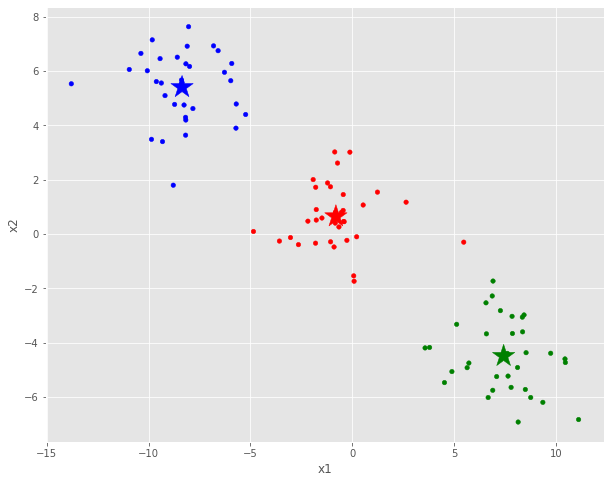

In [12]:
plt.figure(figsize=(7,7));

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue"]
df['color'] = df['cluster'].map(lambda p: colors[p])

ax = df.plot(    
    kind="scatter", 
    x="x1", y="x2",
    figsize=(10,8),
    c = df['color']
)

centroids.plot(
    kind="scatter", 
    x="x1", y="x2", 
    marker="*", c=["r", "g", "b"], s=550,
    ax=ax
);

## Evaluation for k-means clustering
---
Clustering metrics are most useful for:
1. Comparing to other clustering algorithms, and
2. warning us about bad clustering. As discussed above, since there is no definition for clustering, a metric cannot reliably tell us about whether the clustering is good. 

**A high score does not necessarily indicate good clustering.** Instead, it measures at best the difference between the metric and what our clustering algorithm optimized for.


## **Inertia** -- sum of squared errors for each cluster. A low inertia = dense cluster.

> As the number of clusters $k$ increases, inertia decreases. 

## **Silhouette Score** 

- Each point has a silhouette score. Clustering is poor if many points have low scores.
- The score is high if is it:
    - similar to other points in its cluster (low **cohesion**) -AND-
    - dissimilar from points in neighboring clusters (high **separation**).


The average Silhouette Score is the average of each point's score.

- **cohesion** = Average distance of points within clusters
- **separation** = Average distance of points in one cluster to points in other clusters

And it's calculated as:

$$s_i = \frac{b_i - a_i}{max\{a_i, b_i\}}$$

where:

* $a_i$ = Average distance from point $x_i$ to all other points **in the same cluster**.
* $b_i$ = Smallest mean distance from point $x_i$ to all points **in any other cluster**.

And the resulting silhouette score is the average of all the scores:

* -1 = Bad
* 0 = Meh
* 1 = Good

The silhouette score evaluates the viability of your clusters. It is a way to quantify the "cohesion" of local points to their clusters and the separation to other clusters.

## Calclating Silhouette in sklearn

In [13]:
from sklearn.metrics import silhouette_score
silhouette_score(X_sc, km.labels_)

0.6856685892164016

### Programatically Inspecting $k$

Gridsearch is typically used for supervised learning with some scoring objective for optimizing parameters in terms of `best_model`.  We don't really care about the best model as much as we want to see how either inertia or silhouette score changes based on $k$.

We will write a basic process for exploring inertia and silhouette, that you can feel free to adapt to any other ML process you might write in Sklearn for doing custom scoring (using GridsearchCV is better for supervised learning because it has cross validation built-in!).

- Visually inspecting your clusters is vastly superior to relying on programatic parameter searching for an ideal cluster for most data.  
- You can also invent your own evalutation metrics other than inertia or silhoette.  
- The world is also bigger than k-means when it comes to cluster applications.

In [14]:
scores = []
# looping through the number of clusters
for k in range(2, 31):
    cl = KMeans(n_clusters=k)
    cl.fit(X_sc)
    inertia = cl.inertia_
    sil = silhouette_score(X_sc, cl.labels_)
    scores.append([k, inertia, sil])
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']

In [15]:
score_df.head()

,k,inertia,silhouette
0,2,56.111850,0.611233
1,3,15.485859,0.685669
2,4,12.586845,0.579278
3,5,10.370724,0.471374
4,6,8.778907,0.368773


Text(0.5, 1.0, 'Silhouette Score over k')

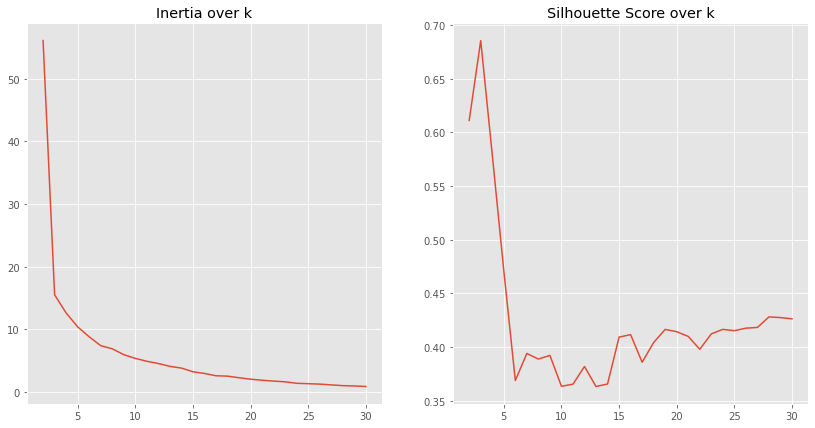

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(score_df.k, score_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(score_df.k, score_df.silhouette);
axes[1].set_title('Silhouette Score over k')

## Conclusion: K-Means tradeoffs

---

**K-Means:**
- Unsupervised clustering model
- Iteratively finds labels given k
- Easy to implement in sklearn
- Sensitive to shape, scale of data **MUST SCALE (!!!)**
- Alos sensitive to outliers and sensitive to centroid initialization
- Optimal k hard to evaluate

---

| Strengths | Weaknesses |
| -- | -- |
| k-Means is popular because it's simple and computationally efficient. | However, k-Means is highly scale dependent and isn't suitable for data of varying shapes and densities. |
| Easy to see results / intuitive. | Evaluating results is more subjective, requiring much more human evaluation than trusted metrics. |